## Step 1 - Illustration of Non-Linear Data

### Step 1a - Import Libraries

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

### Step 1b - Recreate the Plotting Function

In [2]:
# create a function to display model fitting

def plot_svc_decision_function(model, ax=None, plot_support=True):
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create a grid for model evaluation
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### Step 1c - Create Non-Linear Dummy Data

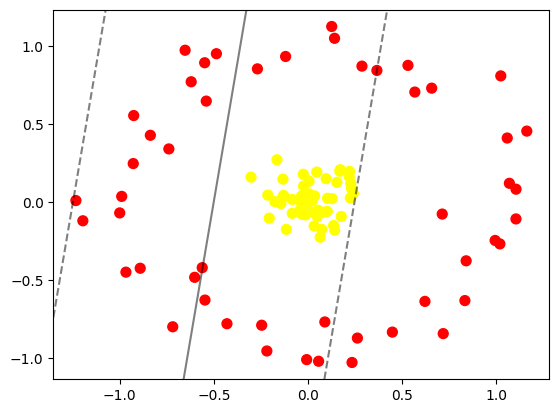

In [3]:
# example of non-linearly separable data
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [4]:
r = np.exp(-(X**2).sum(1))

In [5]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.71227738, -0.07598738],
       [ 0.12807215,  0.0226837 ],
       [-0.73939973,  0.34077138],
       [-0.26907773,  0.85299559],
       [-0.1303318 ,  0.04367413],
       [ 0.36536907,  0.84282966],
       [ 0.5303463 ,  0.8753887 ],
       [ 0.00530653,  0.05264667],
       [-0.0402544 ,  0.00477988],
       [ 0.17604904, -0.09124461],
       [ 0.08216931, -0.06465639],
       [-0.65310616,  0.97215604],
       [-0.5491489 ,  0.89207612],
       [ 0.21864293,  0.16389197],
       [ 0.00125377, -0.00417034],
       [ 0.03226369, -0.15298689],
       [-0.30303681,  0.16017966],
       [-1.00036433, -0.0687024 ],
       [ 0.83937645, -0.37507494],
       [ 0.05265058, -0.05123088],
       [-0.89148833, -0.42252412],
       [ 0.05584975, -1.0176198 ],
       [ 0.02390022,  0.01114043],
       [-0.60230386, -0.48063699],
       [-0.2189273 , -0.95194365],
       [ 0.0723188 , -0.17372151],
       [-0.24641373, -0.78711607],
       [

## Step 2 - Model Fitting

In [6]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

,C,1000000.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


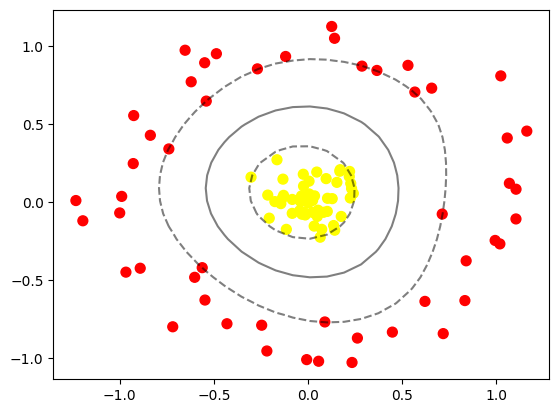

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')